In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 - 단순선형회귀 예제
 

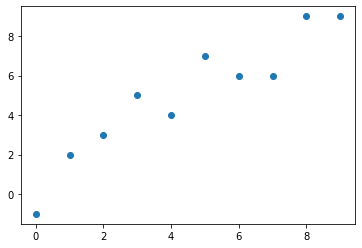

In [4]:
# X : 특성행렬(넘파이 이차원 배열), y : 레이블 벡터(넘파이 일차원 배열)
X = np.arange(10).reshape(10,1) # reshape을 이용하여 2차원으로 만들어준다. 
y = np.array([-1,2,3,5,4,7,6,6,9,9])
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()

In [7]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [11]:
reg.fit(X,y) # 모델훈련(training) = 학습(learning) = 적합(fitting)

LinearRegression()

In [13]:
reg.coef_ # coefficient 계수( 기울기 )  

array([0.96969697])

In [16]:
reg.intercept_ # 절편         , y = 0.63 + 0.96x

0.6363636363636358

In [17]:
pred = reg.predict(X) # X만 있으면 계산된다. 

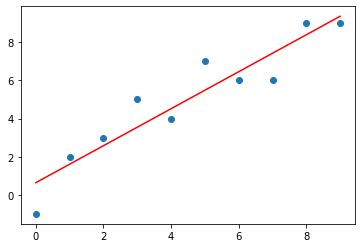

In [19]:
plt.scatter(X,y)
plt.plot(X, pred , c = 'r')

In [22]:
# 절편을 안줄때
reg2 = LinearRegression(fit_intercept = False)

In [23]:
reg2.fit(X,y)

LinearRegression(fit_intercept=False)

In [24]:
reg2.coef_

array([1.07017544])

In [27]:
reg2.intercept_ # 절편을 False했기 때문에 

0.0

In [28]:
pred2 = reg2.predict(X)

In [29]:
pred2

array([0.        , 1.07017544, 2.14035088, 3.21052632, 4.28070175,
       5.35087719, 6.42105263, 7.49122807, 8.56140351, 9.63157895])

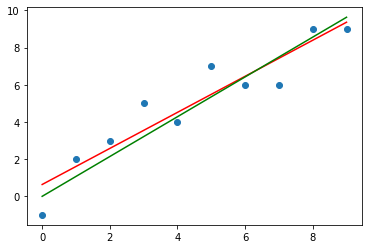

In [30]:
plt.scatter(X,y)
plt.plot(X, pred, c='r')
plt.plot(X, pred2, c='g')

In [36]:
reg.score(X,y) # 결정계수(R^2), score값은 1에 가까울 수록 더 좋음!

0.8815426997245179

In [35]:
reg2.score(X,y)

0.8682216905901117

In [37]:
# fit, predict, score 구현해야 한다. 
class MyLinearReg:
    """
    정규방정식(행렬)을 이용한 선형회귀
    Parameters(매개변수)
    with_intercept : boolean, default : True
      절편여부
    Attributes(속성)
     -----------
    coef_: list 기울기
    intercept_ : float 절편
    """
    
    def __init__(self, with_intercept = True):
        self.with_intercept = with_intercept
    
    def fit(self, X, y):
        n = X.shape[0] # 샘플 계수 
        if self.with_intercept == True:
            X = np.hstack([np.ones((n,1)), X])
        XTX = X.T @ X
        XTy = X.T @ y
        beta = np.linalg.inv(XTX) @ XTy
        if self.with_intercept == True:
            self.coef_, self.intercept_ = beta[1:], beta[0]
        else:
            self.coef_, self.intercept_ = beta, 0
        return self
    
    def predict(self,X):
        y = self.intercept_ + X @ self.coef_
        return y

In [40]:
my_reg = MyLinearReg()
my_reg.fit(X, y)
print(my_reg.coef_)

[0.96969697]


In [41]:
my_reg2 = MyLinearReg(with_intercept = False)
my_reg2.fit(X , y)
print(my_reg2.coef_)

[1.07017544]
